```yaml
#%mldev nb_context

test_pipeline:
    - imports
    - load_iris
    - 3d_fig
    
results: [fig]
```

In [1]:
import os
import pickle
from sklearn import datasets
from sklearn.model_selection import train_test_split

DATA_PATH = "./../data"

def make_dir(dir):
    os.makedirs(dir, exist_ok=True)

def load_and_split():
    X, y = datasets.load_iris(return_X_y=True)
    X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_dev, y_train, y_dev = train_test_split(X_pretrain, y_pretrain, test_size=0.2)
    return X_train, X_dev, X_test, y_train, y_dev, y_test


def save_data(X_train, y_train):
    def do_pickle(obj, path):
        with open(path, "wb") as fp:
            pickle.dump(obj, fp)

    do_pickle(X_train, f"{DATA_PATH}/X_train.pickle")
    do_pickle(y_train, f"{DATA_PATH}/y_train.pickle")


make_dir(f"{DATA_PATH}")
X_train, X_dev, X_test, y_train, y_dev, y_test = load_and_split()
save_data(X_train, y_train)

In [2]:
import pickle
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

FILES = os.environ['FILES']
DATA_PATH = os.environ['DATA_PATH']

def loadData():
    def loadFromPickle(path):
        with open(path, "rb") as fp:
            result = pickle.load(fp)
        return result

    files = FILES.split()
    
    X_train = loadFromPickle(f"{DATA_PATH}/{files[0]}")
    y_train = loadFromPickle(f"{DATA_PATH}/{files[1]}")
    return X_train, y_train


X_train, y_train = loadData()


#%mldev imports

In [3]:
# import some data to play with
X = X_train[:, :2]  # we only take the first two features.
y = y_train

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

#%mldev load_iris

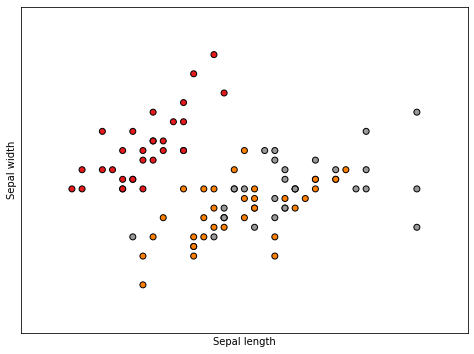

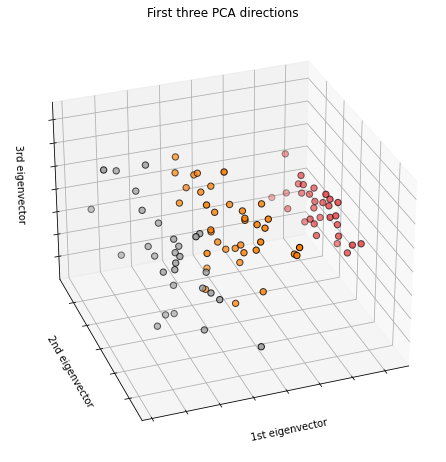

In [26]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_train)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

#%mldev 3d_fig